<a href="https://colab.research.google.com/github/Shaikmd3797/Linear-Regression-problems/blob/main/Boston_housing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***introduction***


# ***Boston Housing Dataset***

Predicting Median value of owner-occupied homes
The aim of this assignment is to learn the application of machine learning algorithms to data sets. This involves learning what data means, how to handle data, training, cross validation, prediction, testing your model, etc.



The dataset is small in size with only 506 cases. It can be used to predict the median value of a home, which is done here. There are 14 attributes in each case of the dataset. They are:

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per $10,000

11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's

# ***Aim***
1. To implement a linear regression with regularization via gradient descent.
2. to implement gradient descent with Lp norm, for 3 different values of p in (1,2]
3. To contrast the difference between performance of linear regression Lp norm and L2 norm for these 3 different values.
4. Tally that the gradient descent for L2 gives same result as matrix inversion based solution.


# ***import modules and read the datafile***

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [6]:
df = pd.read_csv('Boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
col=list(df.columns)

# ***1st jar of machine learning is data***

1. *cleaning*
2. *encoding*
3. *splitting*
4. *scaling*

# ***1) cleaning the data***

In [8]:
df.isnull().sum() # finding the missing the values

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [9]:
df=df.drop_duplicates() #drop the duplicate data then stored the data into df
df.shape

(506, 14)

In [10]:
df.dtypes #checking the correct format in each column 
# checking the structured data. htis data contain columns and rows properly

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [11]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
for i in col:
  q1=df[i].quantile(0.25)  # 25 th quantile
  q3=df[i].quantile(0.75)  # 75 th quantile
  iqr= q3-q1  #iqr value
  upper= q3+1.5 * iqr
  lower = q1 -1.5* iqr
  outliers=[x for x in df[i] if x< lower or x>upper]
  print('counts of outliers of',i,'is',len(outliers))

counts of outliers of crim is 66
counts of outliers of zn is 68
counts of outliers of indus is 0
counts of outliers of chas is 35
counts of outliers of nox is 0
counts of outliers of rm is 30
counts of outliers of age is 0
counts of outliers of dis is 5
counts of outliers of rad is 0
counts of outliers of tax is 0
counts of outliers of ptratio is 15
counts of outliers of black is 77
counts of outliers of lstat is 7
counts of outliers of medv is 40


In [13]:
#outliers of each column has high if it remove or change it will affect the result of dataset

In [14]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [15]:
df=df.dropna()
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# **cleaning the completed next step is EDA**

#***2) EDA***

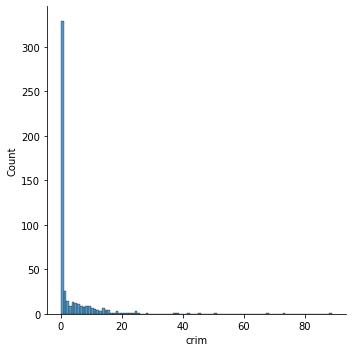

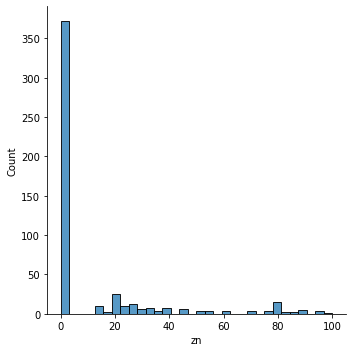

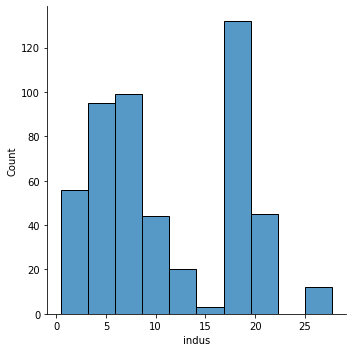

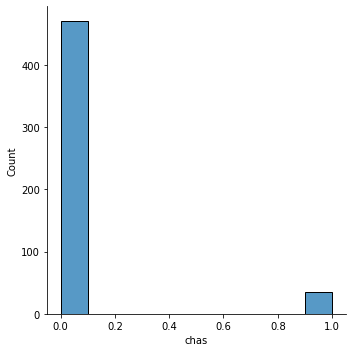

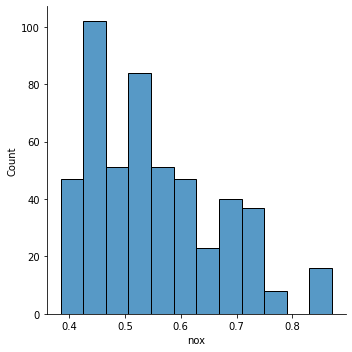

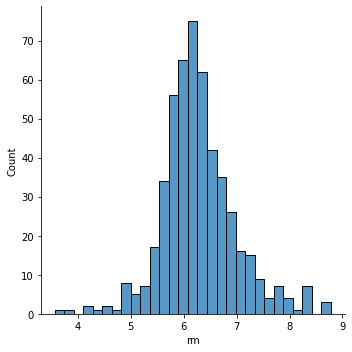

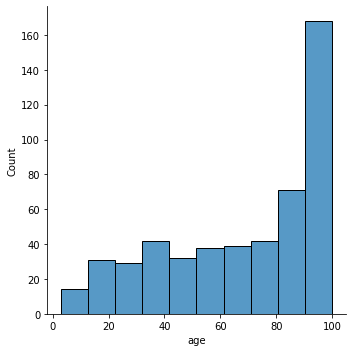

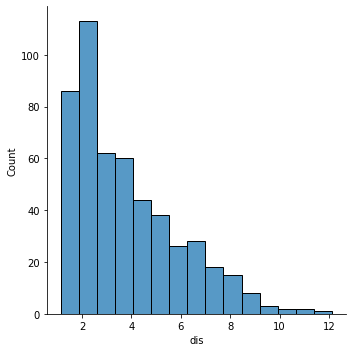

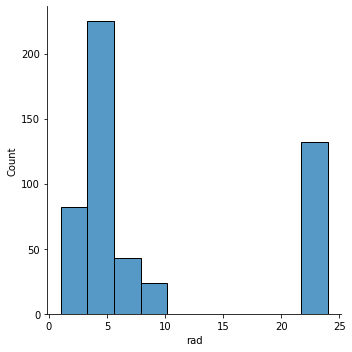

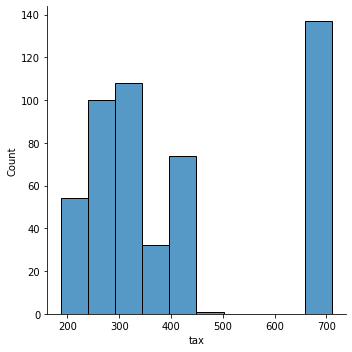

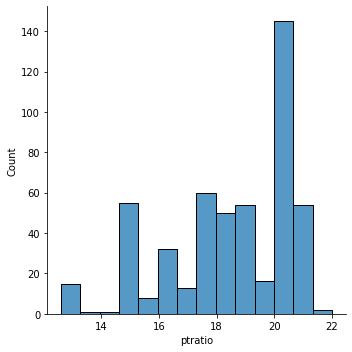

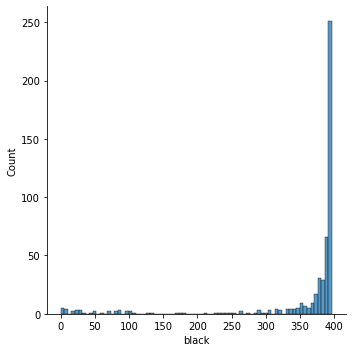

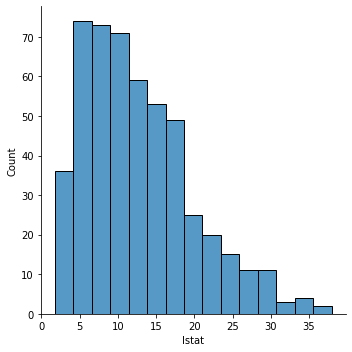

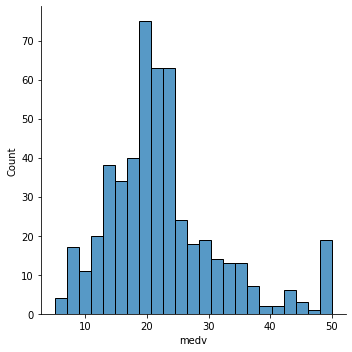

In [16]:
for i in col:
  sns.displot(df,x=i)

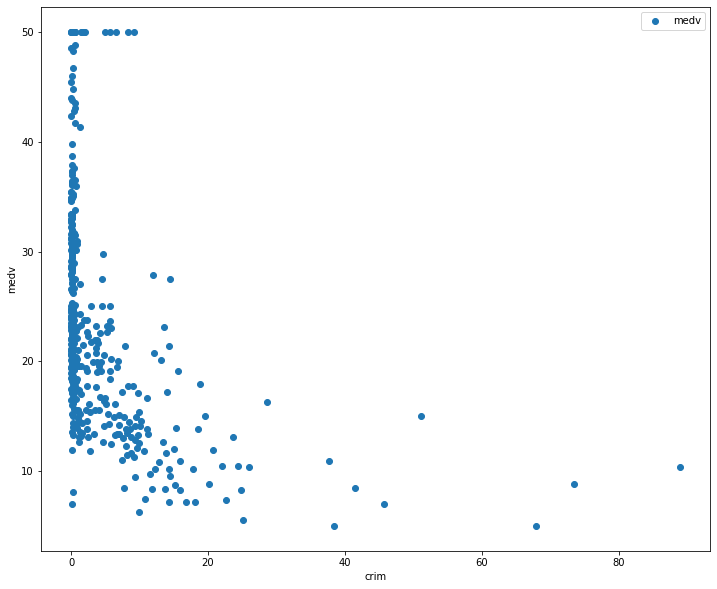

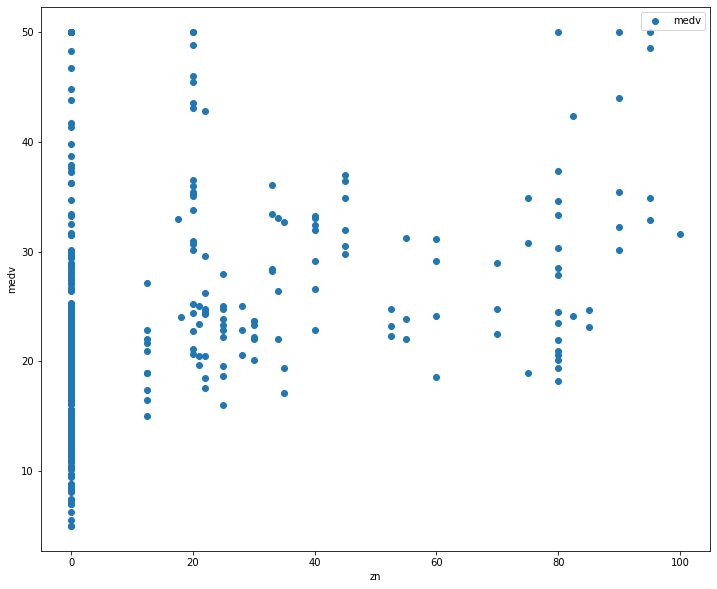

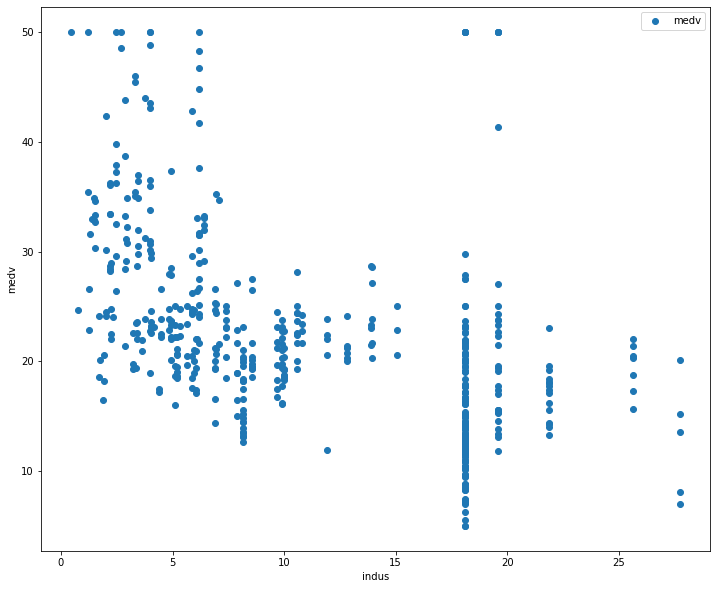

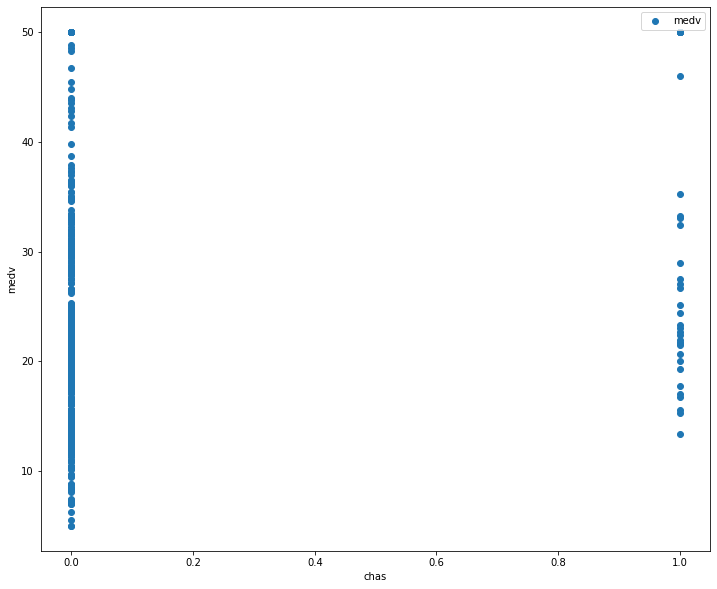

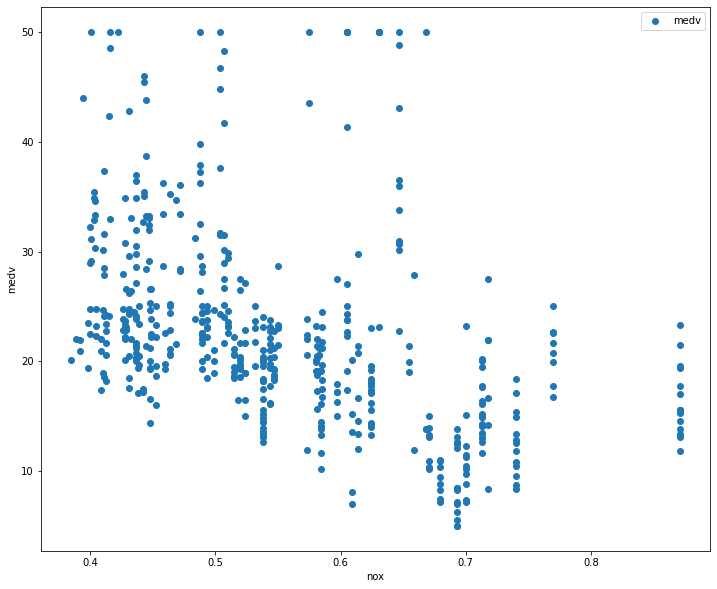

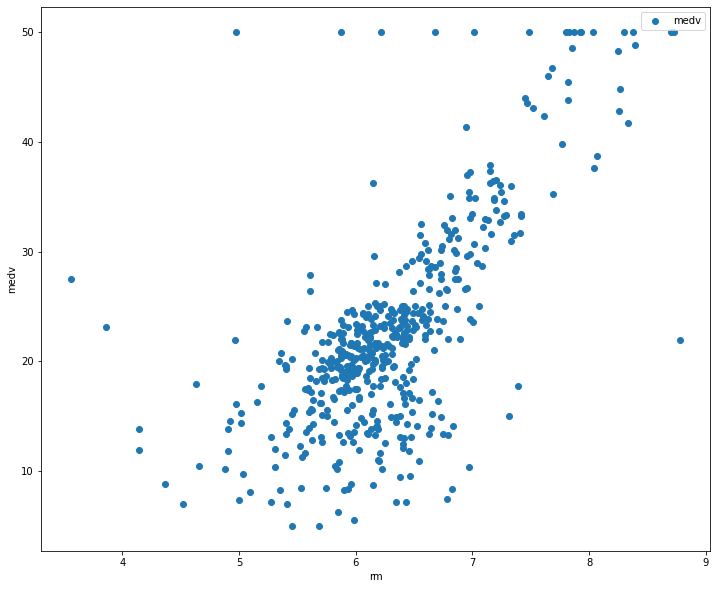

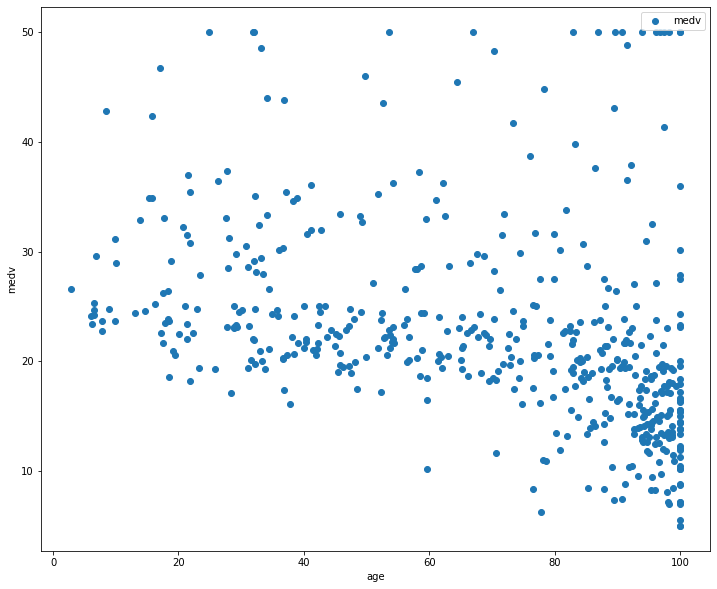

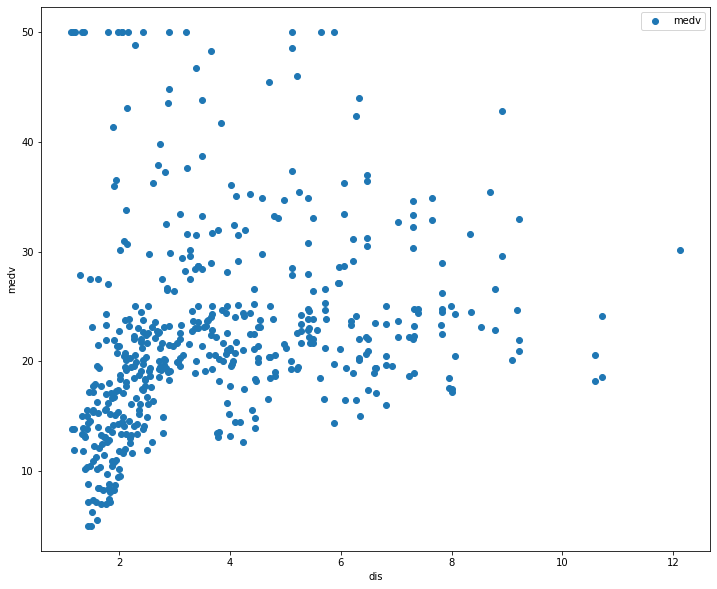

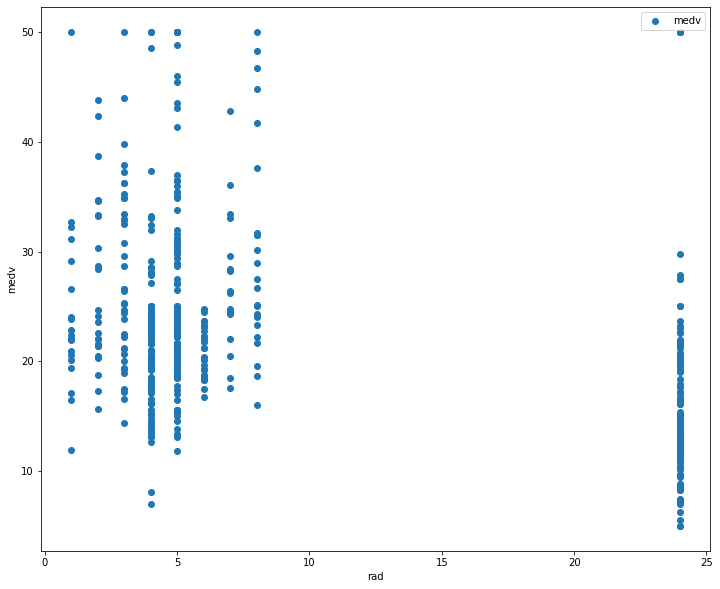

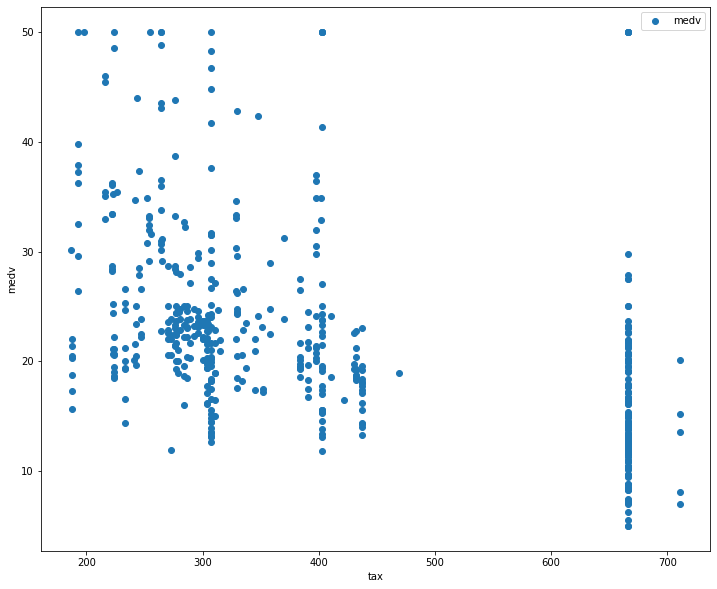

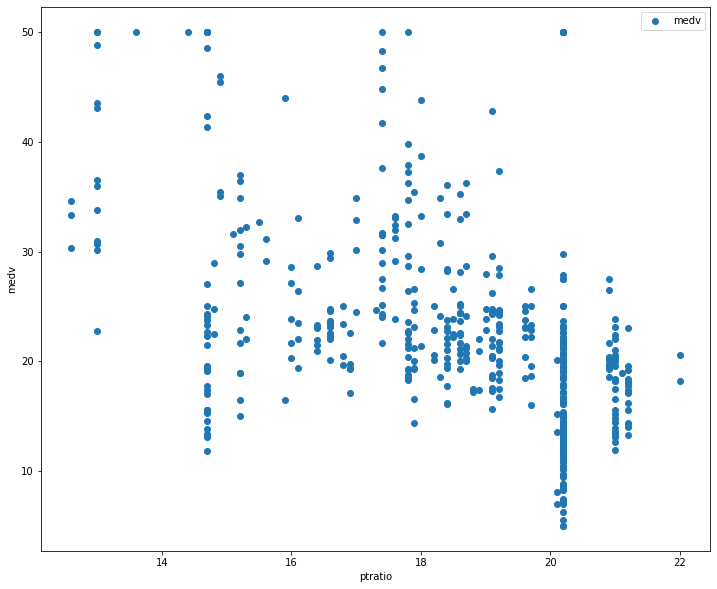

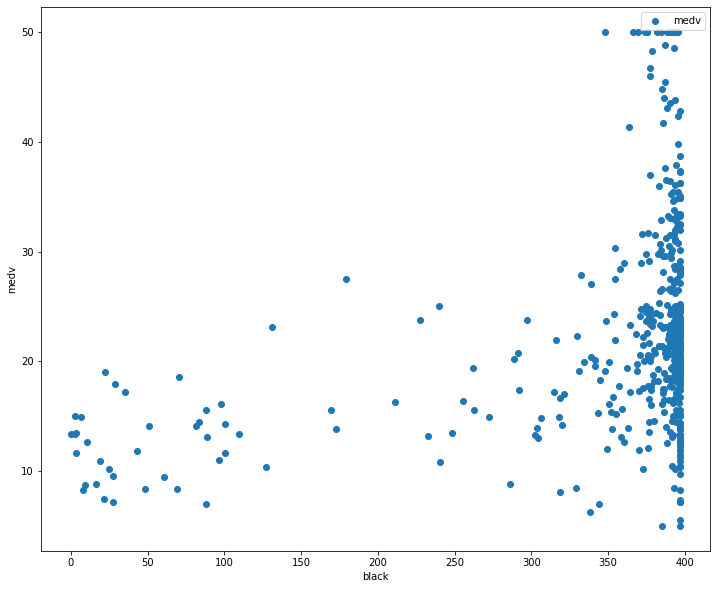

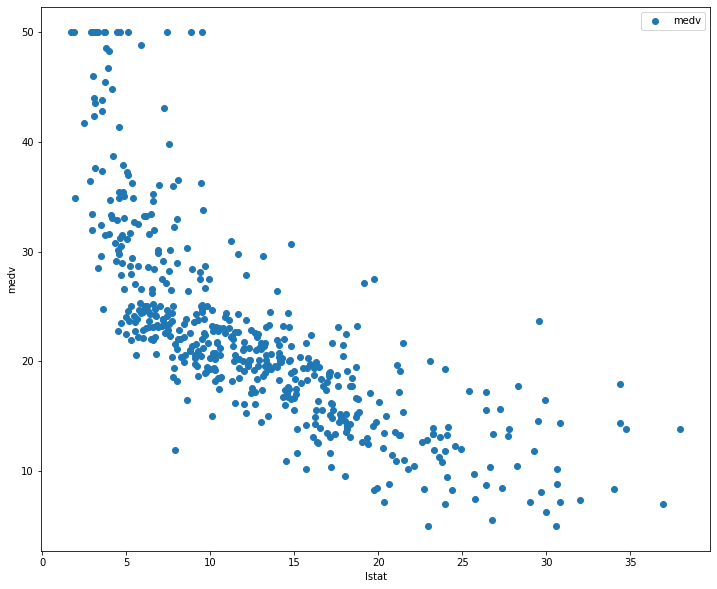

In [43]:
for i in col:
  if i!='medv':
    df.plot(x=i,y='medv',style='o', figsize=(12,10))
    plt.xlabel(i)
    plt.ylabel('medv')
    plt.show()

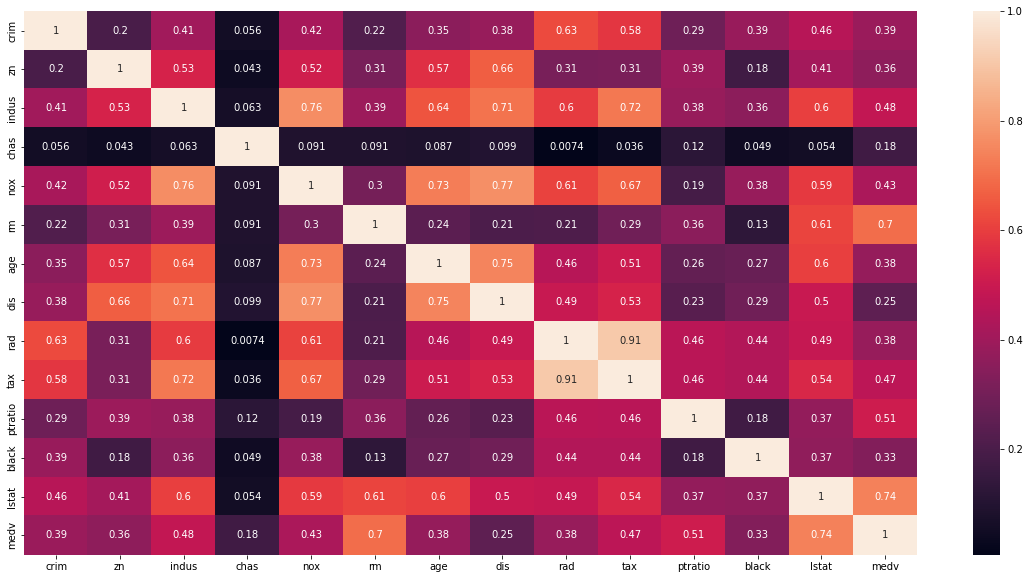

In [18]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

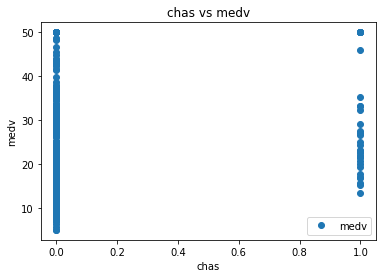

In [19]:
df['transformed'] = np.power(df['chas'],0.5) # transformation
df.plot(x='transformed', y='medv', style='o')
plt.title('chas vs medv')
plt.xlabel('chas')
plt.ylabel('medv')
plt.show()

In [20]:
df[['transformed','medv']].corr()

,transformed,medv
transformed,1.00000,0.17526
medv,0.17526,1.00000


# ***All transformed column is not give linear relation to target variable.so we drop that feature***

#***3)encoding***

#***encoding is not needed for this data because this data not contains any catagorical datas.***

# ***4) splitting the data for train and test***

In [21]:
from sklearn.model_selection import train_test_split # import necessasary package

In [22]:
X=df.loc[:,['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']]
y=df.loc[:,'medv']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=67)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

        crim    zn  indus    nox     rm   age     dis  rad  tax  ptratio  \
356  8.98296   0.0  18.10  0.770  6.212  97.4  2.1222   24  666     20.2   
179  0.05780   0.0   2.46  0.488  6.980  58.4  2.8290    3  193     17.8   
268  0.54050  20.0   3.97  0.575  7.470  52.6  2.8720    5  264     13.0   
12   0.09378  12.5   7.87  0.524  5.889  39.0  5.4509    5  311     15.2   
389  8.15174   0.0  18.10  0.700  5.390  98.9  1.7281   24  666     20.2   
..       ...   ...    ...    ...    ...   ...     ...  ...  ...      ...   
7    0.14455  12.5   7.87  0.524  6.172  96.1  5.9505    5  311     15.2   
453  8.24809   0.0  18.10  0.713  7.393  99.3  2.4527   24  666     20.2   
202  0.02177  82.5   2.03  0.415  7.610  15.7  6.2700    2  348     14.7   
309  0.34940   0.0   9.90  0.544  5.972  76.7  3.1025    4  304     18.4   
323  0.28392   0.0   7.38  0.493  5.708  74.3  4.7211    5  287     19.6   

      black  lstat  
356  377.73  17.60  
179  396.90   5.04  
268  390.30   3.16  
12 

# ***5)scaling the data***

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()
#X_train=X_train.reshape(-1,1)
#X_test=X_test.reshape(-1,1)

In [26]:
scaler.fit(X_train) # scaling is not mandatory for linear regression
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)

# ***2nd jar is task***

**this is supervised learning problem because we predict the target variable**

**feature is continous data so it is regression problem**

# ***3rd jar - model (linear regression***


# ***4th jar - loss function***
# ***5th jar - learning***


---





In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
reg=LinearRegression()
reg.fit(X_train_scale, y_train)

LinearRegression()

In [29]:
coeff_df=reg.coef_  # best value of m
coeff_df

array([-1.01335408,  0.95734577,  0.25002115, -1.68495375,  3.27325272,
        0.24206201, -2.91158227,  2.77411095, -2.07349716, -2.22345861,
        1.04189482, -3.87482969])

In [30]:
reg.intercept_ # best value of c

23.23403693931398

In [31]:
y_predict=reg.predict(X_test_scale)
y_predict

array([25.30200417, 14.89427048,  4.35047294, 23.94562773, 18.35674985,
       20.09409812, 27.04158288, 20.42830111, 36.43916111, 21.55133045,
       24.60842779, 28.80441535, 21.52771758, 22.87387364, 44.42757651,
       12.11857027, 19.85904591, 20.23332559, 25.62623205, 12.49569397,
       25.69538883, 24.81509899, 34.86073397, 30.9494899 , 20.67725518,
        8.9415616 , 14.11798525, 19.76409658, 17.72029001, 20.21326091,
       19.65806922, 31.80608518, 31.62395803, 33.22847981, 18.62914796,
       20.19683676, 17.95730174, 17.38075946, 17.48476821, 30.33989856,
       18.87796002, 18.98271972, 23.01240335, 25.04334583, 20.45376334,
       22.80244495, -0.65641941, 22.59468217, 29.71053152, 25.20505707,
       29.32224962,  7.89571566,  9.65858148, 19.43609796, 20.71819277,
       13.46247756, 13.91420006, 21.20426923, 24.23392486, 14.77175178,
       27.35338034, 32.27463056, 27.77674262,  2.84037617, 12.88582182,
       25.13699064, 19.35035627, 18.16695176,  5.8842752 , 17.16

# ***6th jar - evalute the model

In [32]:
from sklearn import metrics
print("R2 score is :",metrics.r2_score(y_test,y_predict))

R2 score is : 0.6227801232810327


In [33]:
reg.score(X_test_scale,y_test)

0.6227801232810327

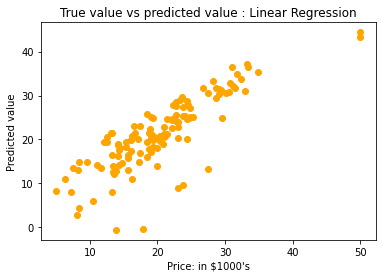

In [34]:
plt.scatter(y_test, y_predict, c = 'orange')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test,y_predict)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)

Mean Square Error :  21.499944481814495
Mean Absolute Error :  3.3466119729449786
